# IMPORT LIBRARIES/DATASETS AND PERFORM EXPLORATORY DATA ANALYSIS

In [1]:
!pip install cufflinks
# Cufflinks is a third-party wrapper library around Plotly

     ---------------------------------------- 0.0/81.7 kB ? eta -:--:--
     ---------------------------------------- 0.0/81.7 kB ? eta -:--:--
     ----- ---------------------------------- 10.2/81.7 kB ? eta -:--:--
     ----- ---------------------------------- 10.2/81.7 kB ? eta -:--:--
     ----- ---------------------------------- 10.2/81.7 kB ? eta -:--:--
     ----- ---------------------------------- 10.2/81.7 kB ? eta -:--:--
     -------------- ----------------------- 30.7/81.7 kB 100.9 kB/s eta 0:00:01
     -------------- ----------------------- 30.7/81.7 kB 100.9 kB/s eta 0:00:01
     ------------------- ------------------ 41.0/81.7 kB 103.4 kB/s eta 0:00:01
     ------------------- ------------------ 41.0/81.7 kB 103.4 kB/s eta 0:00:01
     ------------------- ------------------ 41.0/81.7 kB 103.4 kB/s eta 0:00:01
     ---------------------------- --------- 61.4/81.7 kB 126.1 kB/s eta 0:00:01
     ---------------------------- --------- 61.4/81.7 kB 126.1 kB/s eta 0:00:01
    

In [55]:
import numpy as np # Multi-dimensional array object
import pandas as pd # Data Manipulation
import matplotlib.pyplot as plt # Data Visualization
import seaborn as sns # Data Visualization
import plotly.express as px # Interactive Data Visualization
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot # Offline version of the Plotly modules.
import cufflinks as cf # Works as a connector between the pandas library and plotly
cf.go_offline() 
init_notebook_mode(connected=True) # To connect Jupyter notebook with JavaScript
from jupyterthemes import jtplot # Jupyter theme
jtplot.style(theme= 'monokai', context= 'notebook', ticks= True, grid= False)

In [56]:
# Read the CSV file 
telecom_df = pd.read_csv("telecom_churn.csv")

In [57]:
# Load the top 5 instances
telecom_df.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
0,16,128,415,2845,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,2301,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,1616,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,2510,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,155,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [58]:
# Load the bottom 5 instances 
telecom_df.tail()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
4995,11,50,408,2000,0,1,40,235.7,127,40.07,...,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0
4996,49,152,415,394,0,0,0,184.2,90,31.31,...,73,21.83,213.6,113,9.61,14.7,2,3.97,3,1
4997,7,61,415,313,0,0,0,140.6,89,23.90,...,128,14.69,212.4,97,9.56,13.6,4,3.67,1,0
4998,7,109,510,3471,0,0,0,188.8,67,32.10,...,92,14.59,224.4,89,10.10,8.5,6,2.30,0,0
4999,46,86,415,2412,0,1,34,129.4,102,22.00,...,104,22.70,154.8,100,6.97,9.3,16,2.51,0,0


In [59]:
# Check the shape of the dataframe
telecom_df.shape

(5000, 21)

In [60]:
# Display the feature columns
telecom_df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'class'],
      dtype='object')

In [61]:
# Obtain the summary of the dataframe
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   int64  
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   int64  
 3   phone_number                   5000 non-null   int64  
 4   international_plan             5000 non-null   int64  
 5   voice_mail_plan                5000 non-null   int64  
 6   number_vmail_messages          5000 non-null   int64  
 7   total_day_minutes              5000 non-null   float64
 8   total_day_calls                5000 non-null   int64  
 9   total_day_charge               5000 non-null   float64
 10  total_eve_minutes              5000 non-null   float64
 11  total_eve_calls                5000 non-null   int64  
 12  total_eve_charge               5000 non-null   f

# PERFORM DATA VISUALIZATION

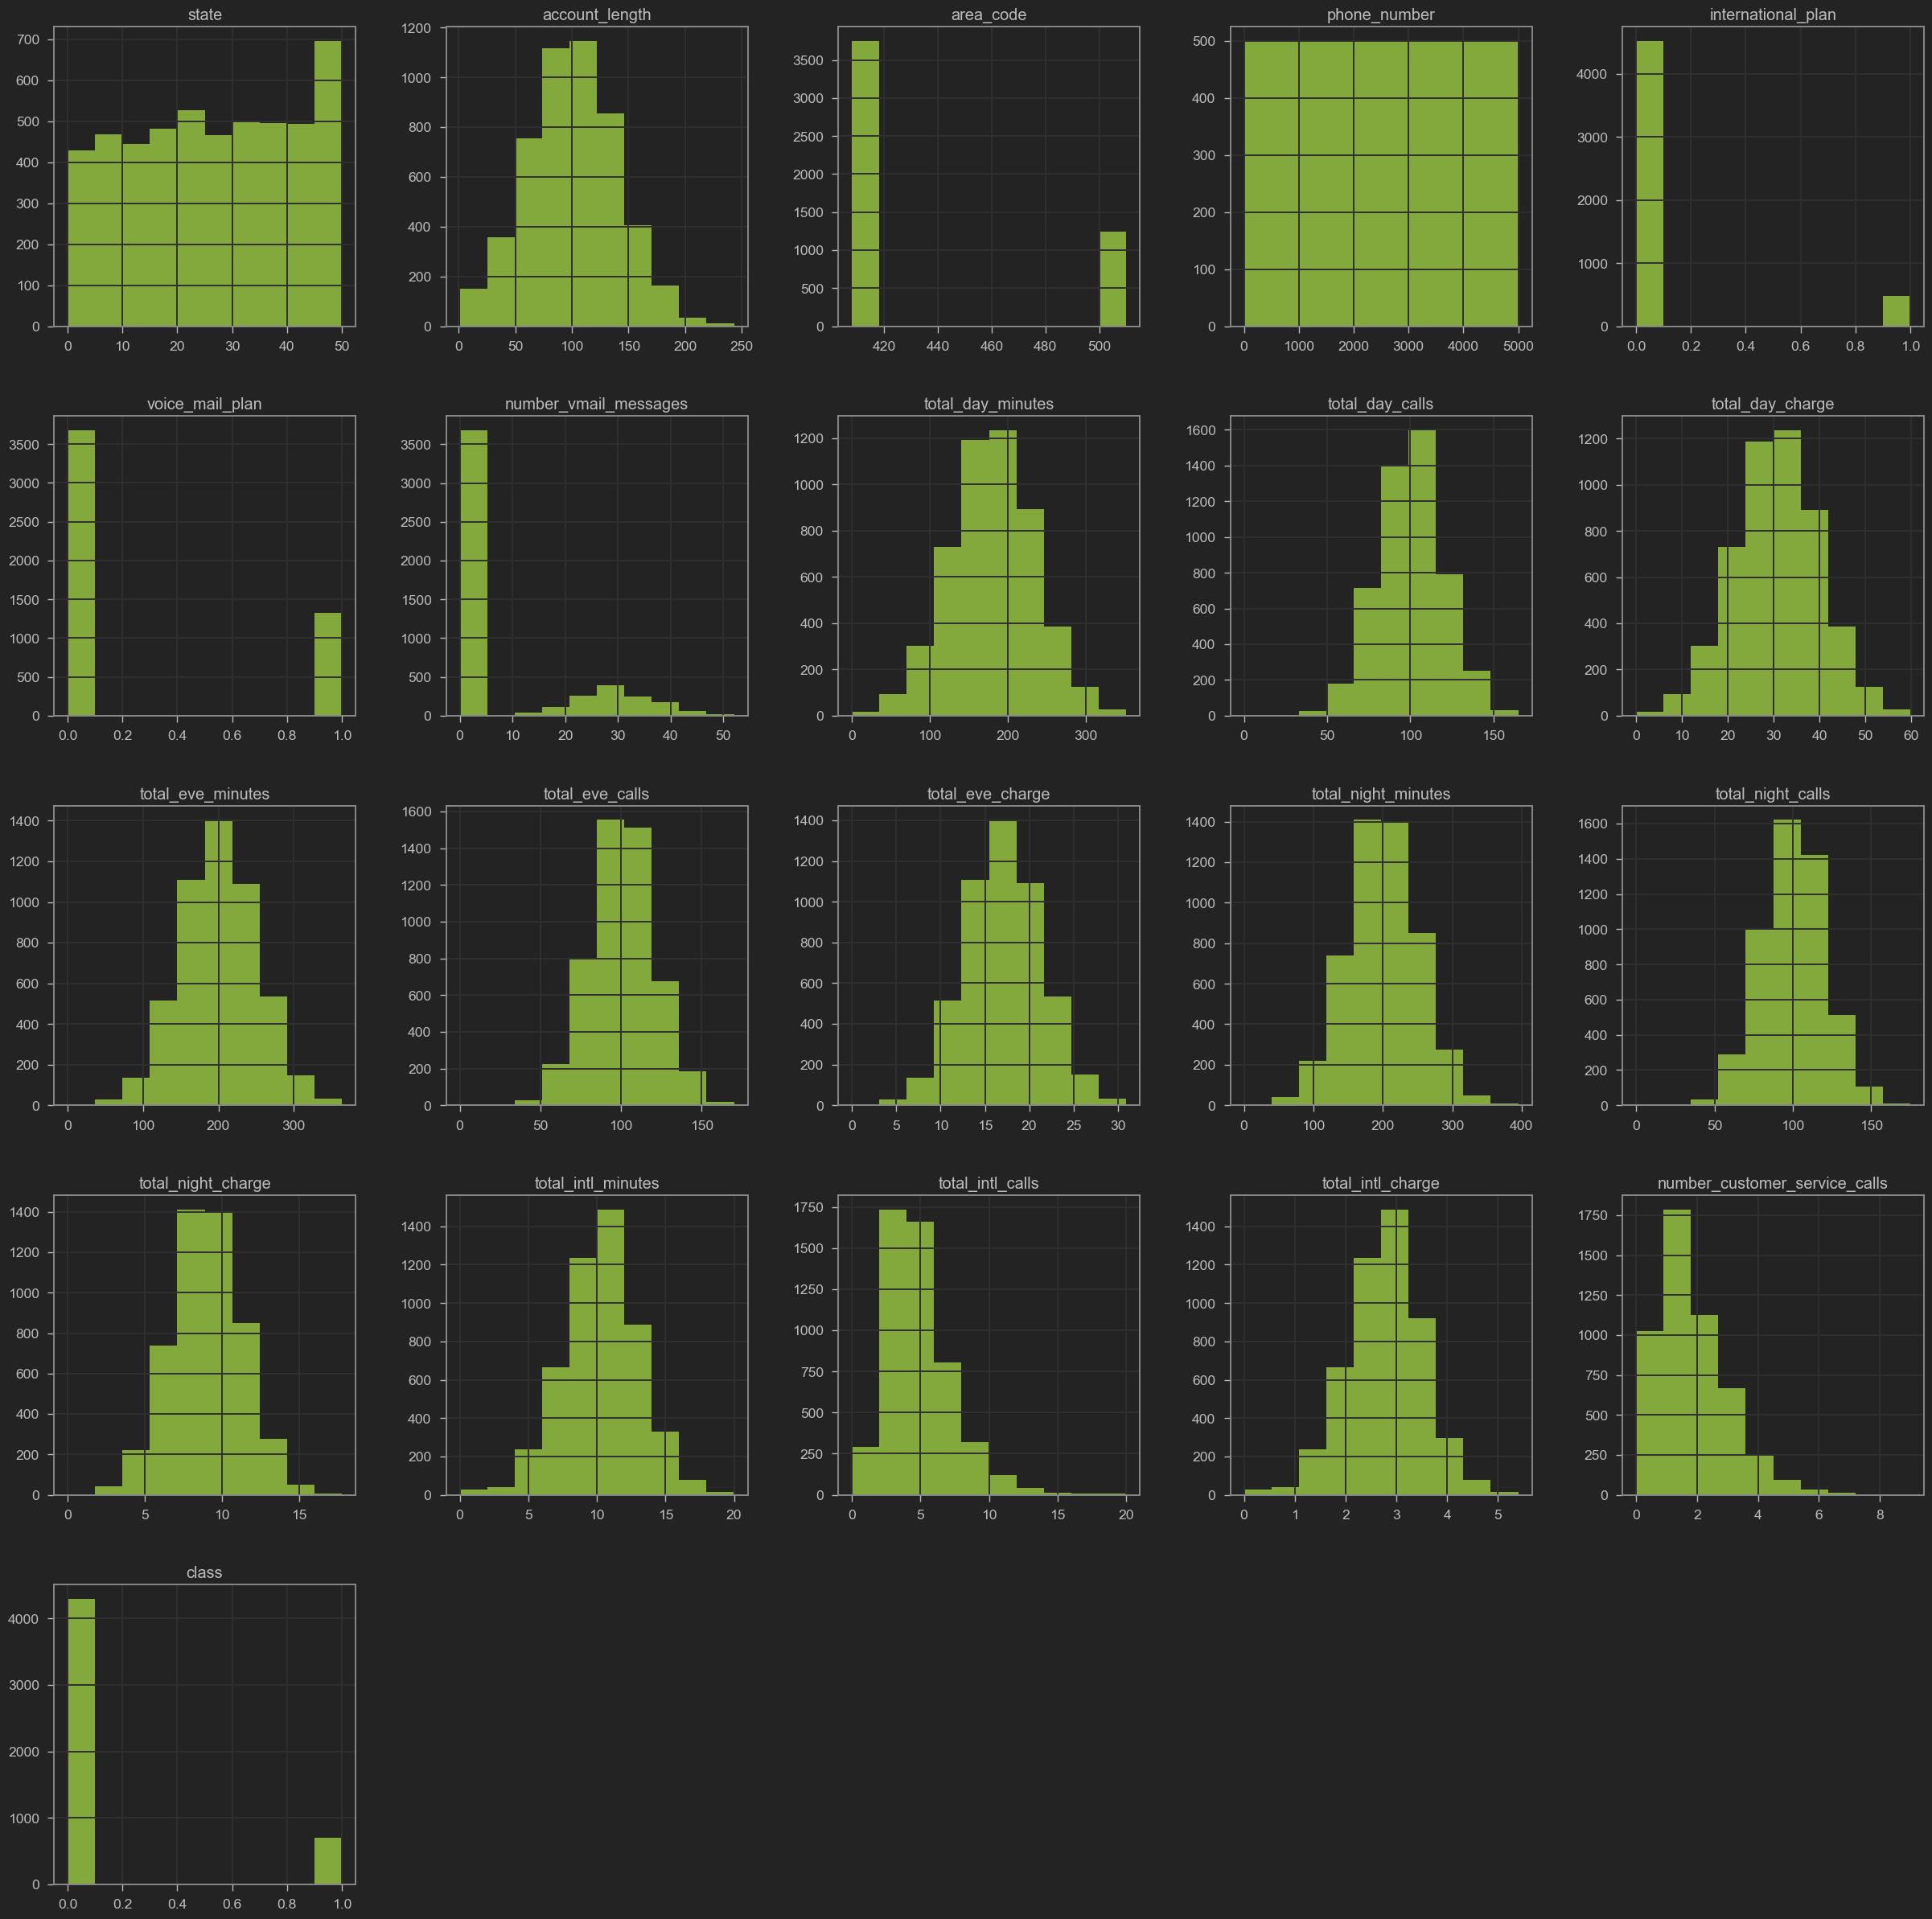

In [91]:
telecom_df.hist(figsize = (30, 30), color='g')
plt.show()

In [63]:
telecom_df["class"].value_counts()

class
0    4293
1     707
Name: count, dtype: int64

In [64]:
# Plot pie Chart to get the information about the percentage of Telecom Customers churning using Plotly histogram

import plotly.graph_objects as go
fig = go.Figure(data = [go.Pie(labels = ["Exited (1)", "Retained (0)"], values = telecom_df["class"].value_counts())])
fig.show()

In [65]:
# Plot histogram graph for the international plan service used by the Telecom customers with respect to churned/Retained

fig = px.histogram(telecom_df, x = "international_plan",
                  color = "class",
                  title = "International Plan service opted by the Telecom Customers")
fig.show()

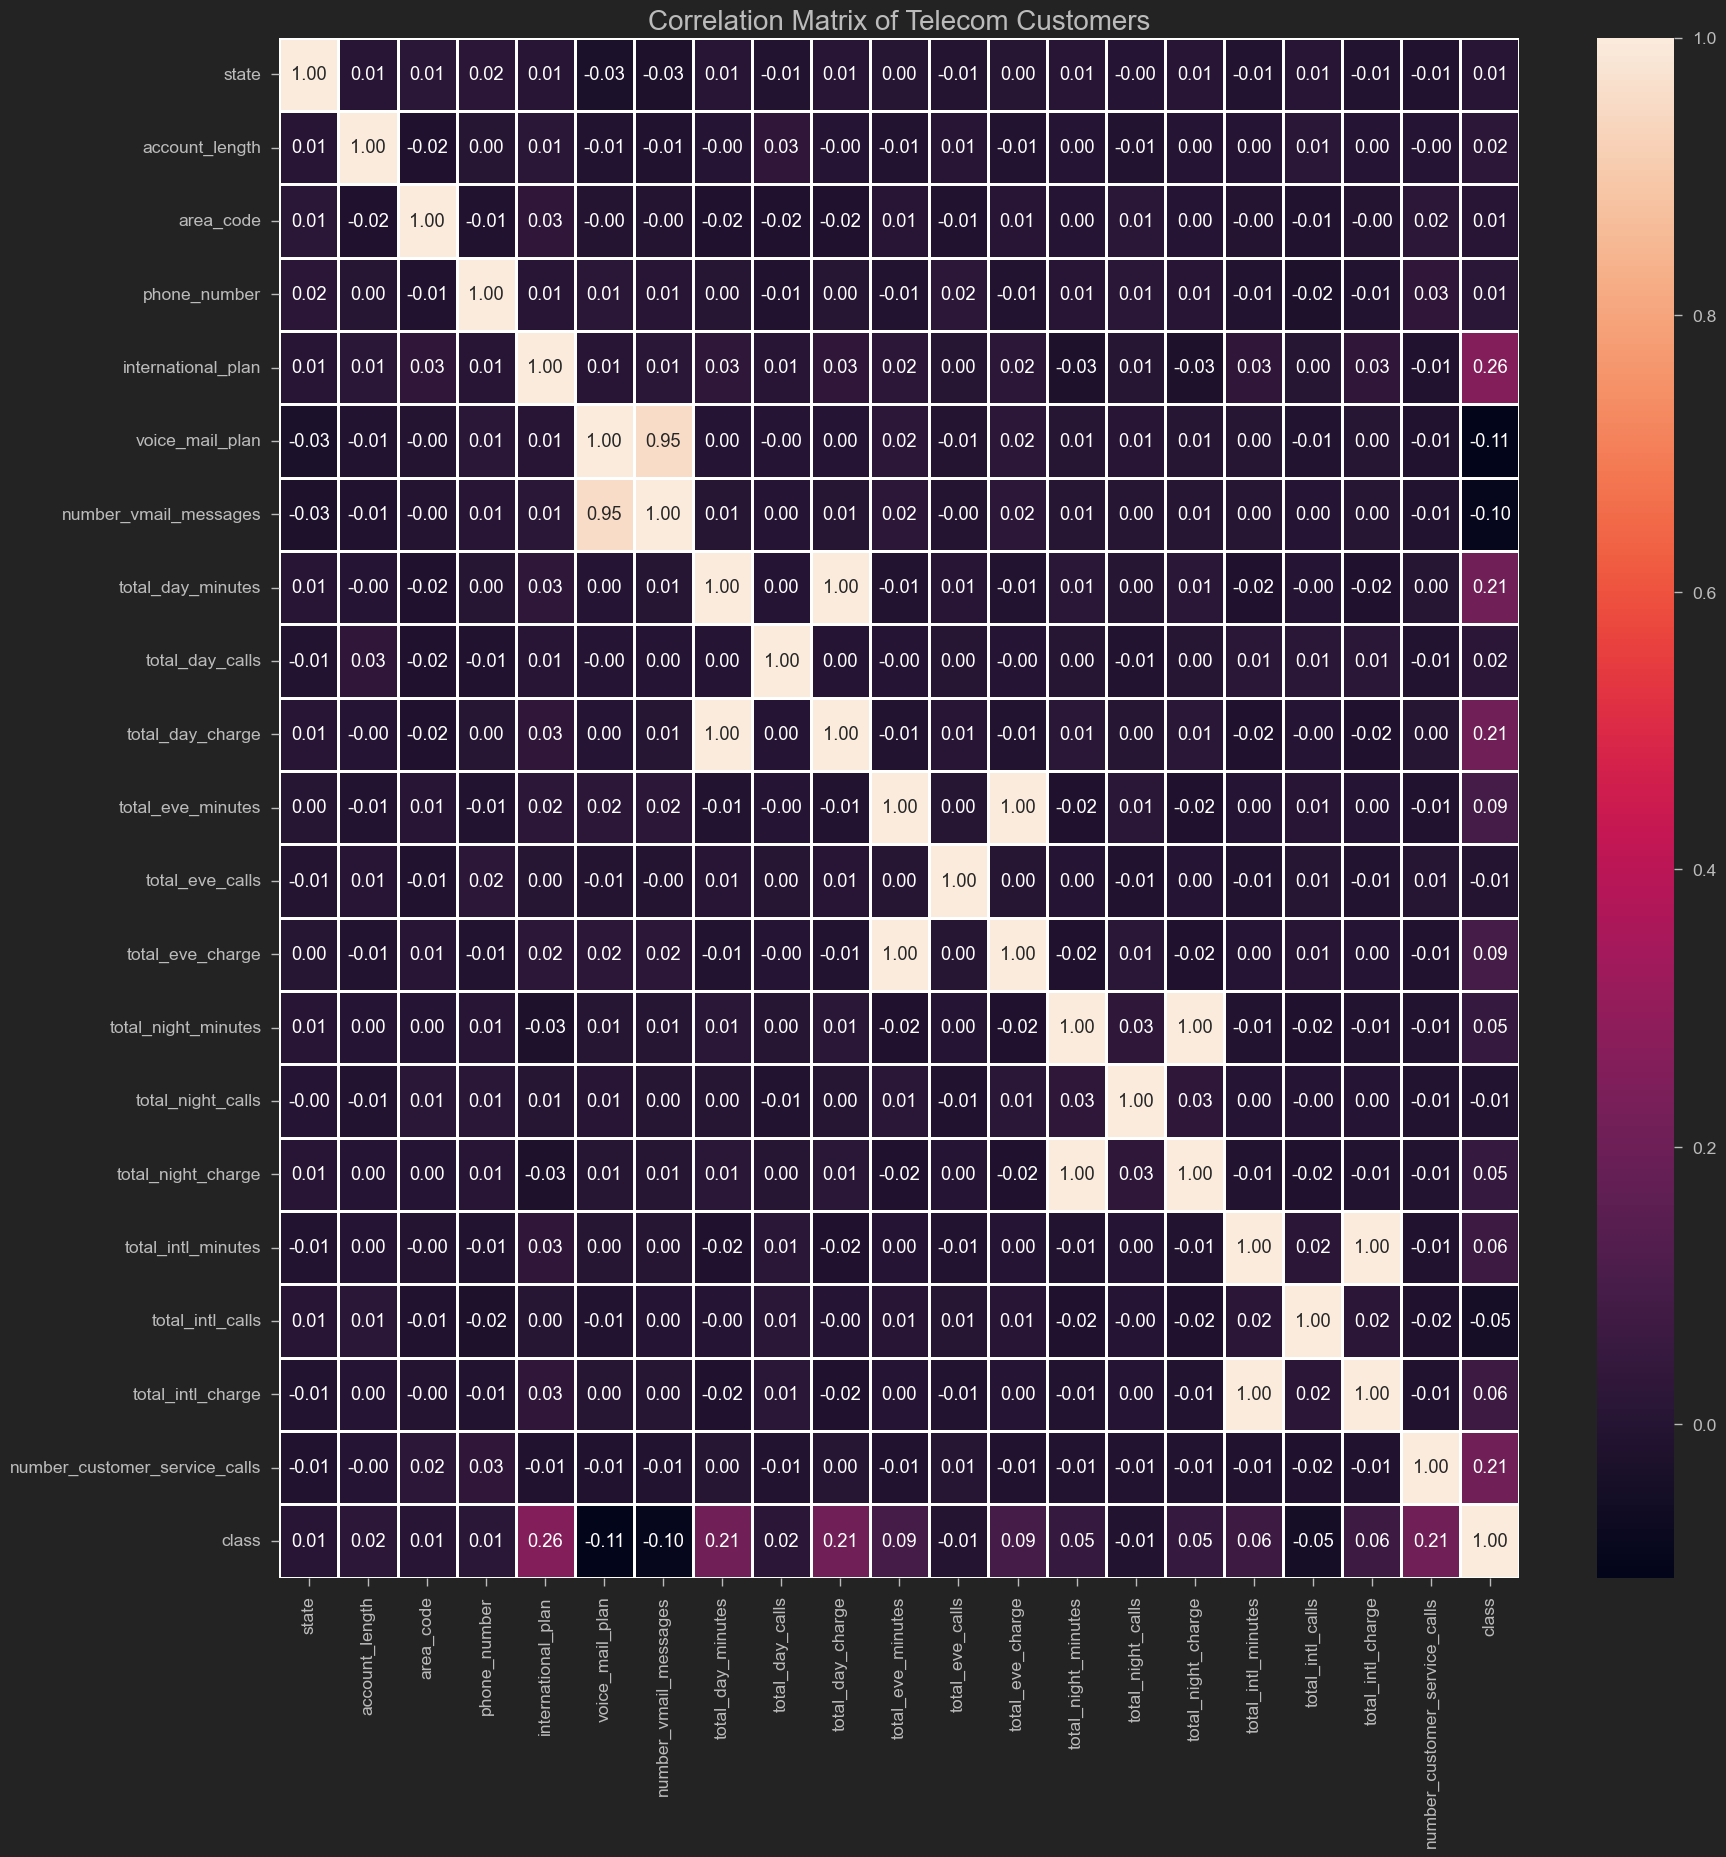

In [92]:
# Correlation Matrix

corr_matrix = telecom_df.corr()
plt.figure(figsize = (20,20))
cm = sns.heatmap(corr_matrix,
               linewidths = 1,
               annot = True, 
               fmt = ".2f")
plt.title("Correlation Matrix of Telecom Customers", fontsize = 20)
plt.show()

# It is clearly shown that "voice_mail_plan" and "number_vmail_messages" are highly correlated.
# It is clearly shown that "total day charge" and "total daily minutes" are highly correlated.

C:\Users\vishw\AppData\Local\Temp\ipykernel_13420\1730360311.py:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\vishw\AppData\Local\Temp\ipykernel_13420\1730360311.py:4: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




Text(0.5, 1.0, 'Distribution of day charges by churn')

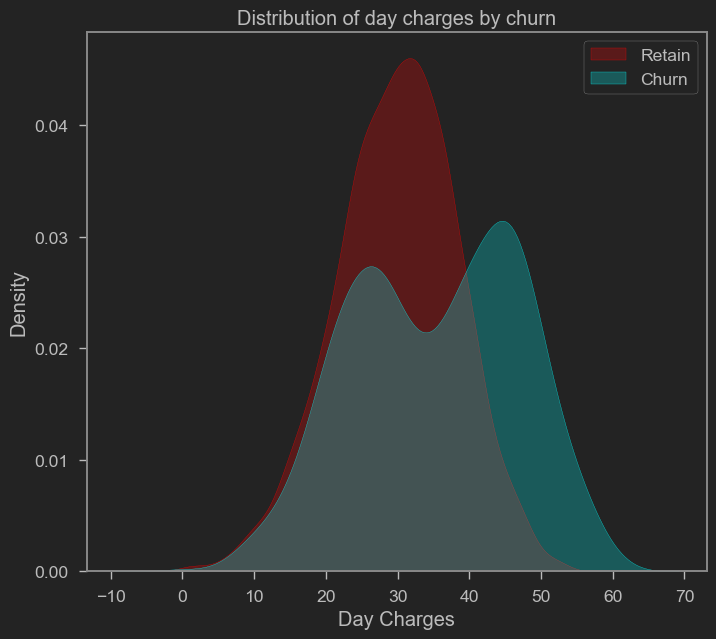

In [93]:
# Churn by day charges
ax = sns.kdeplot(telecom_df.total_day_charge[(telecom_df["class"] == 0)],
               color = "Red", shade = True)
ax = sns.kdeplot(telecom_df.total_day_charge[(telecom_df["class"] == 1)],
               color = "cyan", shade = True)

ax.legend(["Retain", "Churn"], loc = "upper right")
ax.set_ylabel("Density")
ax.set_xlabel("Day Charges")
ax.set_title("Distribution of day charges by churn")

C:\Users\vishw\AppData\Local\Temp\ipykernel_13420\775704015.py:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\vishw\AppData\Local\Temp\ipykernel_13420\775704015.py:4: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




Text(0.5, 1.0, 'Distribution of evening charges by churn')

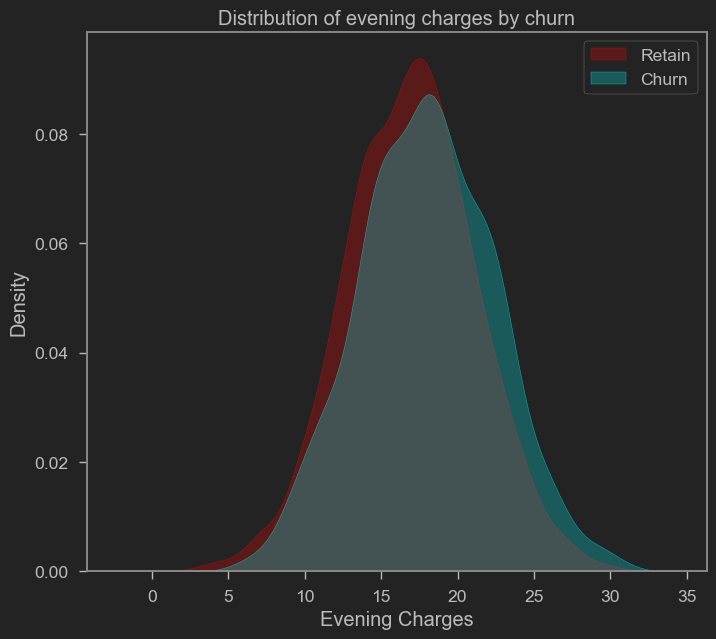

In [96]:
# Churn by evening charges
ax = sns.kdeplot(telecom_df.total_eve_charge[(telecom_df["class"] == 0)],
               color = "red", shade = True)
ax = sns.kdeplot(telecom_df.total_eve_charge[(telecom_df["class"] == 1)],
               color = "cyan", shade = True)

ax.legend(["Retain", "Churn"], loc = "upper right")
ax.set_ylabel("Density")
ax.set_xlabel("Evening Charges")
ax.set_title("Distribution of evening charges by churn")

# IDENTIFY FEATURE IMPORTANCE & PREPARE THE DATA BEFORE MODEL TRAINING 

In [97]:
# Unnecessary features would decrease the training speed, the model interpretability and the generalization performance on the test data. 
# Therefore, finding and selecting the most useful features in the dataset is crucial.
# Assigning input features to X and output (Churn) to y

X = telecom_df.drop(["class", "area_code", "phone_number"], axis = "columns") # area_code and phone_number features are irrelevant to proceed further to train the model
y = telecom_df["class"]

In [98]:
X.shape

(5000, 18)

In [71]:
y.shape

(5000,)

In [72]:
# Perform train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 150)

In [73]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train.values.ravel())

RandomForestClassifier()

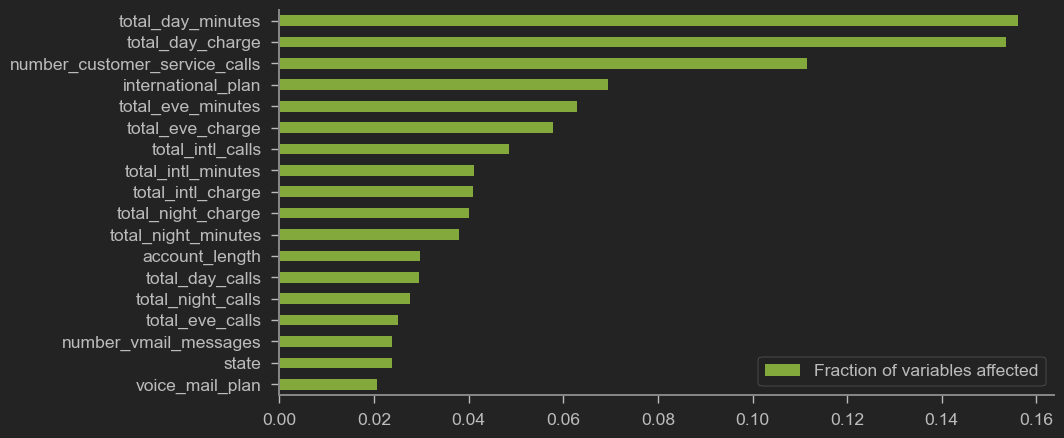

In [99]:
# Plot the feature importance

feat_scores= pd.DataFrame({"Fraction of variables affected" : rf.feature_importances_},index = X.columns)
feat_scores= feat_scores.sort_values(by = "Fraction of variables affected")
feat_scores.plot(kind = "barh", figsize = (10, 5), color='g')
sns.despine()

# TRAIN AND EVALUATE A LOGISTIC REGRESSION CLASSIFIER

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model_LR = LogisticRegression()   
model_LR.fit(X_train, y_train)
y_predict = model_LR.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1299
           1       0.42      0.09      0.15       201

    accuracy                           0.86      1500
   macro avg       0.65      0.54      0.54      1500
weighted avg       0.81      0.86      0.82      1500



c:\Users\vishw\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



# TRAIN AND EVALUATE A SUPPORT VECTOR MACHINE CLASSIFIER

c:\Users\vishw\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

c:\Users\vishw\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\Users\vishw\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

c:\Users\vishw\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\Users\vishw\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning:

The defau

              precision    recall  f1-score   support

           0       0.88      0.97      0.93      1299
           1       0.51      0.17      0.25       201

    accuracy                           0.87      1500
   macro avg       0.70      0.57      0.59      1500
weighted avg       0.83      0.87      0.84      1500



c:\Users\vishw\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



<Axes: >

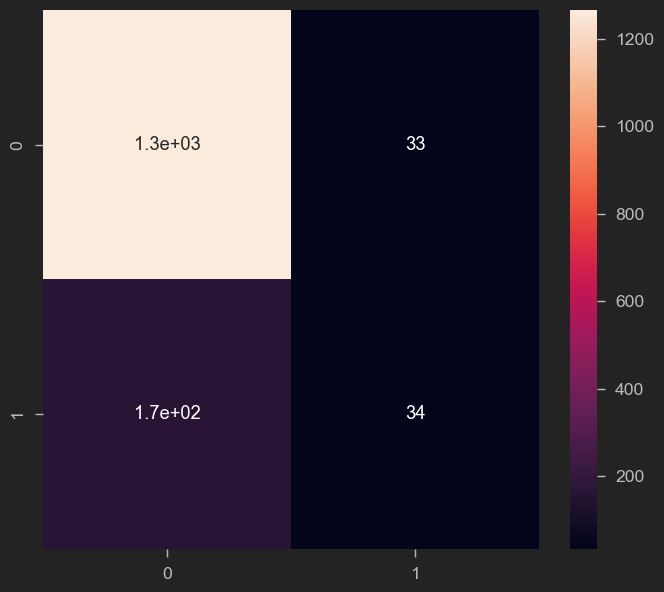

In [76]:
from sklearn.calibration import CalibratedClassifierCV # For probability score output
from sklearn.svm import LinearSVC

model_svc = LinearSVC(max_iter=100000)
model_svm = CalibratedClassifierCV(model_svc) 
model_svm.fit(X_train, y_train)
y_predict = model_svm.predict(X_test)

print(classification_report(y_test, y_predict))

# Confusion Matrix
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

# TRAIN AND EVALUATE A RANDOM FOREST CLASSIFIER

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1299
           1       0.93      0.75      0.83       201

    accuracy                           0.96      1500
   macro avg       0.95      0.87      0.90      1500
weighted avg       0.96      0.96      0.96      1500



<Axes: >

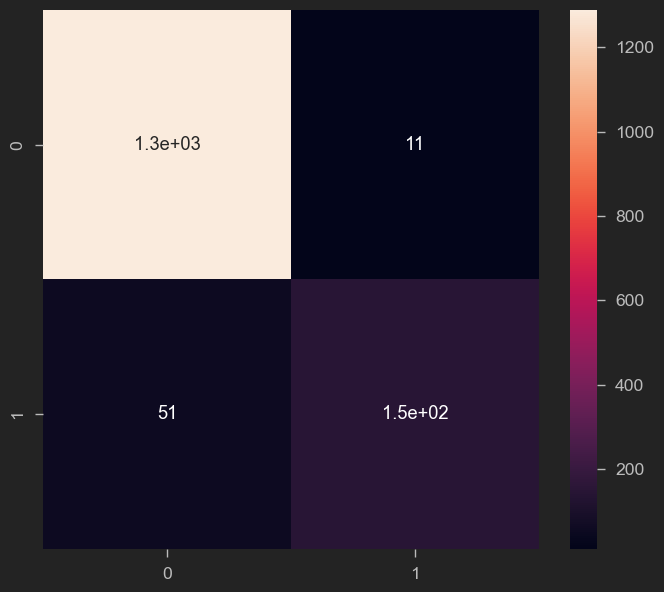

In [77]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
y_predict = model_rf.predict(X_test)

print(classification_report(y_test, y_predict))

# Confusion Matrix
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

# TRAIN AND EVALUATE A K-NEAREST NEIGHBOUR (KNN)

              precision    recall  f1-score   support

           0       0.89      0.98      0.94      1299
           1       0.67      0.25      0.37       201

    accuracy                           0.88      1500
   macro avg       0.78      0.62      0.65      1500
weighted avg       0.86      0.88      0.86      1500



<Axes: >

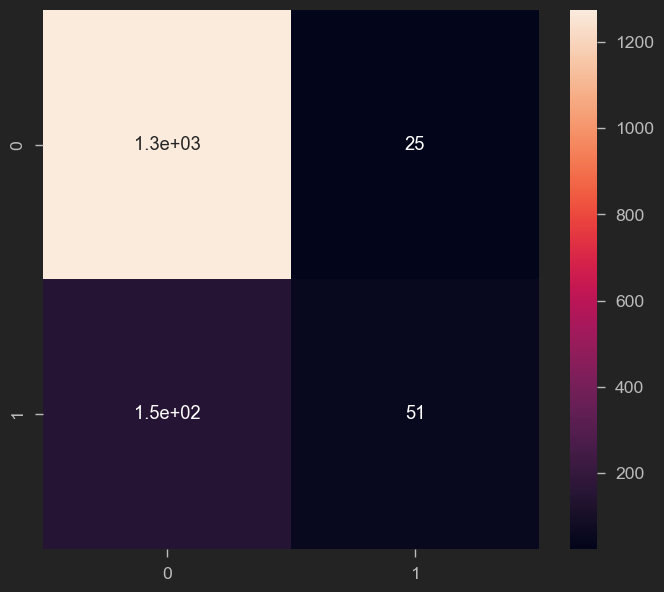

In [78]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
y_predict = model_knn.predict(X_test) 

print(classification_report(y_test, y_predict))

# Confusion Matrix
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

# TRAIN AND EVALUATE A NAIVE BAYES CLASSIFIER

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1299
           1       0.53      0.52      0.52       201

    accuracy                           0.87      1500
   macro avg       0.73      0.72      0.72      1500
weighted avg       0.87      0.87      0.87      1500



<Axes: >

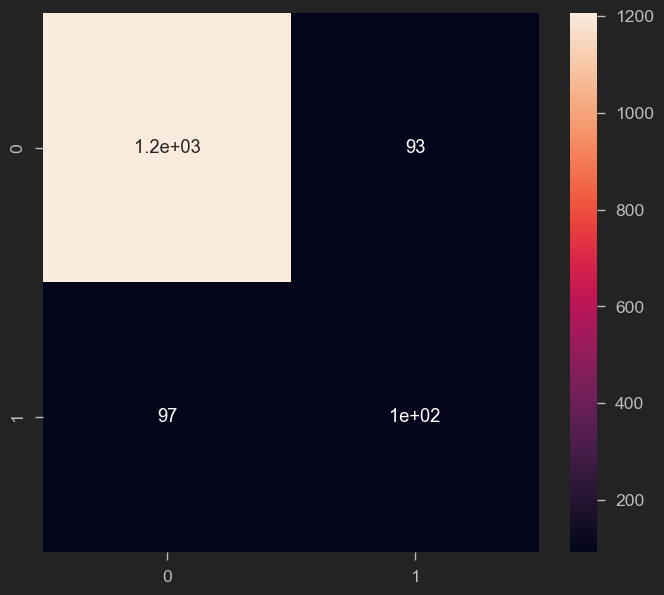

In [79]:
from sklearn.naive_bayes import GaussianNB
model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train)
y_predict = model_gnb.predict(X_test)

print(classification_report(y_test, y_predict))

# Confution Matrix
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

# PLOT ROC CURVES FOR THE 5 MODELS AND FIND AUC SCORES

In [80]:
model_LR.predict_proba(X_test)

array([[0.97266906, 0.02733094],
       [0.91923692, 0.08076308],
       [0.89804699, 0.10195301],
       ...,
       [0.92085612, 0.07914388],
       [0.94875874, 0.05124126],
       [0.97626118, 0.02373882]])

In [81]:
model_LR.predict_proba(X_test)[:, 1]

array([0.02733094, 0.08076308, 0.10195301, ..., 0.07914388, 0.05124126,
       0.02373882])

In [82]:
y_test

4827    0
1793    0
2957    0
4218    0
2188    0
       ..
4230    1
3824    0
262     0
1100    0
4359    0
Name: class, Length: 1500, dtype: int64

In [83]:
from sklearn.metrics import roc_curve
fpr1, tpr1, thresh1 = roc_curve(y_test, model_LR.predict_proba(X_test)[:, 1], pos_label= 1)

In [84]:
fpr1

array([0.00000000e+00, 7.69822941e-04, 7.69822941e-04, 3.07929176e-03,
       3.07929176e-03, 5.38876059e-03, 5.38876059e-03, 7.69822941e-03,
       7.69822941e-03, 8.46805235e-03, 8.46805235e-03, 1.38568129e-02,
       1.38568129e-02, 1.46266359e-02, 1.46266359e-02, 1.53964588e-02,
       1.53964588e-02, 1.77059276e-02, 1.77059276e-02, 1.84757506e-02,
       1.84757506e-02, 1.92455735e-02, 1.92455735e-02, 2.30946882e-02,
       2.30946882e-02, 2.46343341e-02, 2.46343341e-02, 2.54041570e-02,
       2.54041570e-02, 2.61739800e-02, 2.61739800e-02, 3.77213241e-02,
       3.77213241e-02, 3.84911470e-02, 3.84911470e-02, 3.92609700e-02,
       3.92609700e-02, 4.00307929e-02, 4.00307929e-02, 4.61893764e-02,
       4.61893764e-02, 4.77290223e-02, 4.77290223e-02, 4.84988453e-02,
       4.84988453e-02, 4.92686682e-02, 4.92686682e-02, 6.23556582e-02,
       6.23556582e-02, 6.62047729e-02, 6.62047729e-02, 6.69745958e-02,
       6.69745958e-02, 7.15935335e-02, 7.15935335e-02, 7.31331794e-02,
      

In [85]:
tpr1

array([0.        , 0.        , 0.00497512, 0.00497512, 0.0199005 ,
       0.0199005 , 0.02487562, 0.02487562, 0.03482587, 0.03482587,
       0.039801  , 0.039801  , 0.04477612, 0.04477612, 0.04975124,
       0.04975124, 0.05970149, 0.05970149, 0.07960199, 0.07960199,
       0.08955224, 0.08955224, 0.09452736, 0.09452736, 0.09950249,
       0.09950249, 0.10447761, 0.10447761, 0.11442786, 0.11442786,
       0.12437811, 0.12437811, 0.12935323, 0.12935323, 0.15422886,
       0.15422886, 0.15920398, 0.15920398, 0.1641791 , 0.1641791 ,
       0.16915423, 0.16915423, 0.17412935, 0.17412935, 0.21393035,
       0.21393035, 0.21890547, 0.21890547, 0.22885572, 0.22885572,
       0.23383085, 0.23383085, 0.23880597, 0.23880597, 0.24378109,
       0.24378109, 0.25373134, 0.25373134, 0.25870647, 0.25870647,
       0.27363184, 0.27363184, 0.27860697, 0.27860697, 0.28358209,
       0.28358209, 0.28855721, 0.28855721, 0.29850746, 0.29850746,
       0.30348259, 0.30348259, 0.30845771, 0.30845771, 0.31343

In [86]:
thresh1

array([       inf, 0.84413886, 0.83657557, 0.74798386, 0.7380419 ,
       0.70163213, 0.69392602, 0.65795813, 0.64043405, 0.64038836,
       0.63627   , 0.57022697, 0.56605725, 0.55007895, 0.53095621,
       0.53040634, 0.52462361, 0.51921986, 0.5114954 , 0.5109142 ,
       0.50299348, 0.50290579, 0.50262927, 0.48952972, 0.4885735 ,
       0.48225124, 0.47822235, 0.47762957, 0.47211763, 0.46695879,
       0.46064288, 0.42321089, 0.42320032, 0.42002698, 0.41090656,
       0.40888416, 0.4080307 , 0.4079399 , 0.40769875, 0.39069238,
       0.38901863, 0.38643818, 0.38537967, 0.38369928, 0.37090291,
       0.37008209, 0.36838457, 0.34936747, 0.34709376, 0.34450027,
       0.34324076, 0.34268314, 0.34130299, 0.33786732, 0.33780712,
       0.33555647, 0.33171376, 0.32545274, 0.32477655, 0.32268069,
       0.31992097, 0.3193177 , 0.31832518, 0.31479816, 0.31437362,
       0.31021071, 0.30900356, 0.30258986, 0.30191739, 0.29998811,
       0.29980615, 0.29362736, 0.29318751, 0.29281249, 0.29246

In [87]:
# ROC curve

fpr1, tpr1, thresh1 = roc_curve(y_test, model_LR.predict_proba(X_test)[:, 1], pos_label = 1)
fpr2, tpr2, thresh2 = roc_curve(y_test, model_svm.predict_proba(X_test)[:, 1], pos_label = 1)
fpr3, tpr3, thresh3 = roc_curve(y_test, model_rf.predict_proba(X_test)[:, 1], pos_label = 1)
fpr4, tpr4, thresh4 = roc_curve(y_test, model_knn.predict_proba(X_test)[:, 1], pos_label = 1)
fpr5, tpr5, thresh5 = roc_curve(y_test, model_gnb.predict_proba(X_test)[:, 1], pos_label = 1)


In [88]:
# AUC score

from sklearn.metrics import roc_auc_score

auc_score1 = roc_auc_score(y_test, model_LR.predict_proba(X_test)[:, 1])
auc_score2 = roc_auc_score(y_test, model_svm.predict_proba(X_test)[:, 1])
auc_score3 = roc_auc_score(y_test, model_rf.predict_proba(X_test)[:, 1])
auc_score4 = roc_auc_score(y_test, model_knn.predict_proba(X_test)[:, 1])
auc_score5 = roc_auc_score(y_test, model_gnb.predict_proba(X_test)[:, 1])

print("Logistic Regression: ", auc_score1) # Logistic Regression
print("Support Vector Machine: ", auc_score2) # Support Vector Machine
print("Random Forest: ", auc_score3) # Random Forest
print("K-Nearest Neighbors: ", auc_score4) # K-Nearest Neighbors
print("Naive Bayes: ", auc_score5) # Naive Bayes

Logistic Regression:  0.6976089529259017
Support Vector Machine:  0.8101677907613587
Random Forest:  0.9152045775740236
K-Nearest Neighbors:  0.6563123566156898
Naive Bayes:  0.8270158062650564


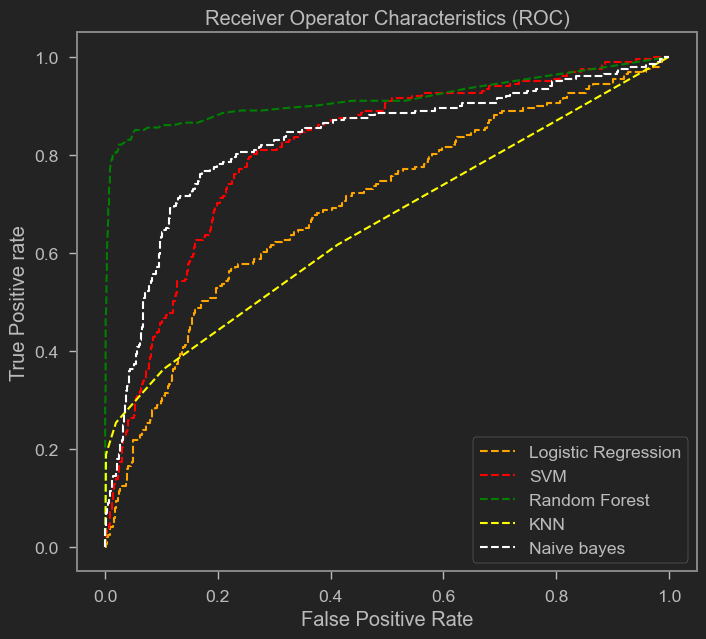

In [102]:
plt.plot(fpr1, tpr1, linestyle = "--", color = "orange", label = "Logistic Regression")
plt.plot(fpr2, tpr2, linestyle = "--", color = "red", label = "SVM")
plt.plot(fpr3, tpr3, linestyle = "--", color = "green", label = "Random Forest")
plt.plot(fpr4, tpr4, linestyle = "--", color = "yellow", label = "KNN")
plt.plot(fpr5, tpr5, linestyle = "--", color = "white", label = "Naive bayes")

plt.title('Receiver Operator Characteristics (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc = 'best')
plt.savefig('ROC', dpi = 300)
plt.show()

The graph represents that Random Forest algorithm produced the best AUC. Therefore, it is clear that Random Forest model did a better job of classifying the churned/retained telecom customers.

# CONCLUSION & PROJECT RECAP

In [90]:
y_predict = model_rf.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1299
           1       0.93      0.75      0.83       201

    accuracy                           0.96      1500
   macro avg       0.95      0.87      0.90      1500
weighted avg       0.96      0.96      0.96      1500



Amongst all the trained models, Random Forest Classifier algorithm produced the highest Area under the ROC curve (AUC).

The following scores are the results of the Random Forest Classifier model

1. Accuracy: ~96% label accuracy
2. Precision: ~96% labeled as Retained customers and ~94% labeled as churned customers
3. Recall: ~99% labeled as Retained customers and ~76% labeled as churned customers